# Laboratory Work: Chickenpox Propagation Prediction/Forecasting

- The objective of this Laboratry Work is to put in application time series data forecasting using a **Deep Neural Network**. For that it is nececssary to learn the model behind the time series data giving the relation between output, input, and their past and future values as given in the relation below:
$$y(k+p)=F(y(k),y(k-1),\ldots,y(k-d_y), u(k),u(k-1),u(k-2),\ldots,u(k-d_u))$$
where:
    - $y(k)$: is the output predicted signal
    - $u(k)$: is the input signal
    - $p$: is the prediction horizont
    - $d_y$: is the output memory/delay order or output prediction order 
    - $d_u$: is the input memory/delay order  or input prediction order 
- In our application  $p>0$, $d_u=0$ and $d_y>0$
- We will resolve this prediction problem by transforming the related recurrent Neural Network to a feedforword Neural Network and using the learning algorithms and tools provided by Keras toolbox. So if we consider that we have a learning base given by $u(k), y(k), k=1,2,\ldots, n $ we have to create one input signal from input learning base $u(k)$ and $d_y+1$ input signal coming from $y(k)$ and its $d_y$  delayed signals. We can begin the prediction learning with $p=1$, $d_y=7$ and $d_u=0$ as given in the construction of learning base in section *Data Base*.
- **Work to be done**:
    - For different perdiction horizon $p\in{1,2,3}$ and memory/predictor order $d_y\in{7,8,9,10}$ propose a Neural Network  architecture, operate the learning phase, give the results of testing phase and make some conclusions wrt accuracy.
    - **Optional**: Propose an implementation of Back Propogation algorithm to operate the learning phase.
    - **Optional**: Propose other Neuronal Network architecture like SimpleRNN, GRU or LSTM to implement and operate the learning and compare your results with the feedforward architecture given above.
    - Genral conclusion
- **A report** on the Laboratory Work has to be written in **Jupyter** or in any other editor.
- **The report** as well as **Jupyter report and code** has to be uploaded to Blackboard  **before 24 of April 2022**  specifying the name of persons involved (**which has to be at maximun two**). The name of the persons involved has to be given in the report also.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from keras import models
from keras import layers
from keras import optimizers

2023-05-10 13:09:41.640761: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 13:09:41.683471: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 13:09:41.684308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 13:09:42.546337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Data Base
- The example trains an **Deep neural Network** to forecast the number of chickenpox cases, taken from the data set **chickenpox_dataset**, given the number of cases in previous months
- Load the example data from **data_chickenpox.txt** text file which contains a single time series, with time steps corresponding to months and values corresponding to the number of cases 
- Construct the input **Deep Neural Network** input w.r.t delay order or output prediction order
- Split the data in **Training Set**, **Validation Set** and **Test Set**
- $nn_0$ gives the output prediction order or number of neurons in the input layer
- $nn_1$ gives the number of neurons in the hidden layer
- $nn_2$ gives the number of neurons in the output layer     

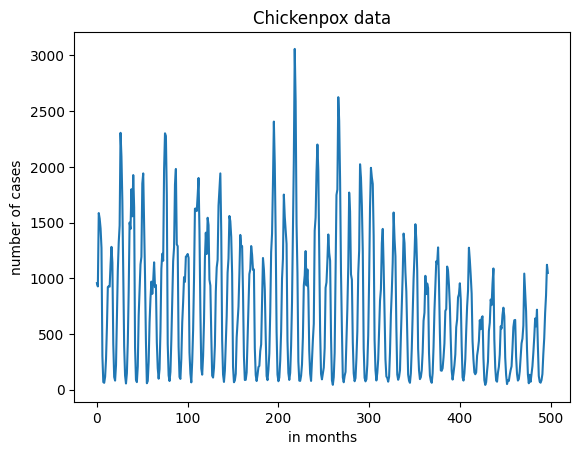

(490, 8)
(490, 1)


In [2]:
S= np.loadtxt('data_chickenpox.txt')
n=len(S)
plt.plot(S)
plt.title('Chickenpox data')
plt.xlabel('in months')
plt.ylabel('number of cases')
plt.show()

p=1                                      # l'horizon de prédiction
dy=7                                     # la mémoire de sortie / l'ordre de retard
nn_0=dy+1                                # nombre de neurones dans la couche d'entrée
nn_1=10                                  # Nombre de neurones dans la couche cachée
nn_2=1                                   # Nombre de neurones dans la couche de sortie   
y=S

# Input Signal Contruction

V=y[dy:len(y)-p,]
for i in range(1, dy+1):
    V=np.c_[V,y[dy-i:len(y)-p-i,]]   

T=np.mat(y[dy+p:len(y),]).T                                   # Target Signal Contruction 
print(V.shape)
print(T.shape)
input_NN=V[:400,:]
target_NN=T[:400,]
input_Test=V[400:,:]
target_Test=T[400:,]


# Standardize Data
For a better fit and to prevent the training from diverging, standardize the training data to have zero mean and unit variance. Standardize the test data using the same parameters as the training data.

In [3]:
input_mean = np.mean(input_NN)
target_mean = np.mean(target_NN)
input_std = np.std(input_NN)
target_std = np.std(target_NN)

input_NN = (input_NN - input_mean) / input_std
target_NN = (target_NN - input_mean) / target_std
input_Test = (input_Test - input_mean) / input_std
target_Test = (target_Test - target_mean) / target_std

# Deep Neural Network Architecture
- Define the type of DNN: In our case we have chosen the **Sequential** DNN
- Define the type of activation function for each layer (**linear,relu,linear** in our case)
- Define the learning/optimization method used (**RMSprop** in our case)
- Define the criteria to minimize and the related metric (**MSE** and **'mae'** in our case)
- Define the **batch size** and the number of **epochs** (**batch_size=4, epochs=50** in our case)
- $nn_0$ gives the prediction order or number of neurons in the input layer
- $nn_1$ gives the number of neurons in the hidden layer
- $nn_2$ gives the number of neurons in the output layer     

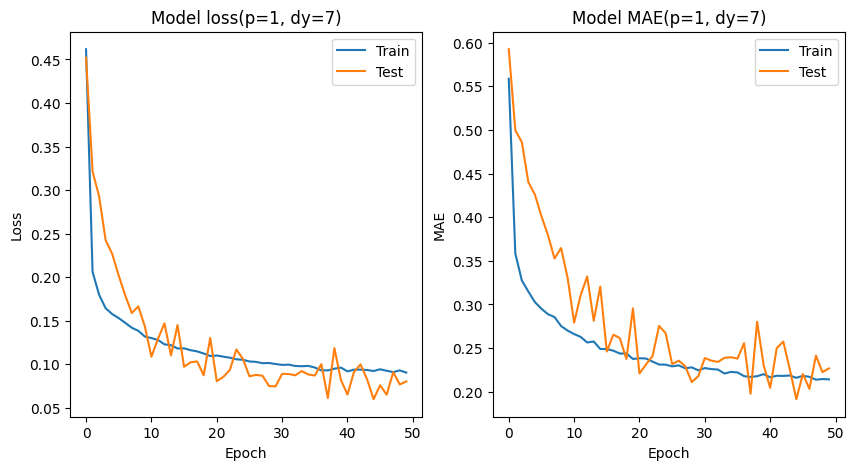

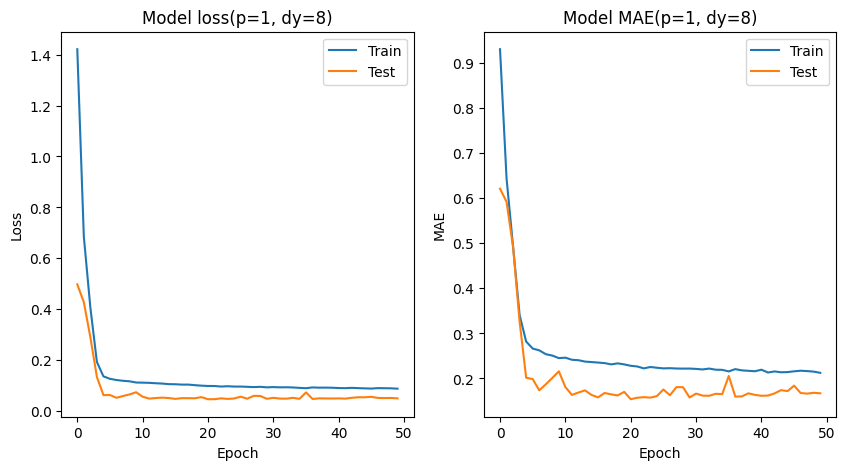

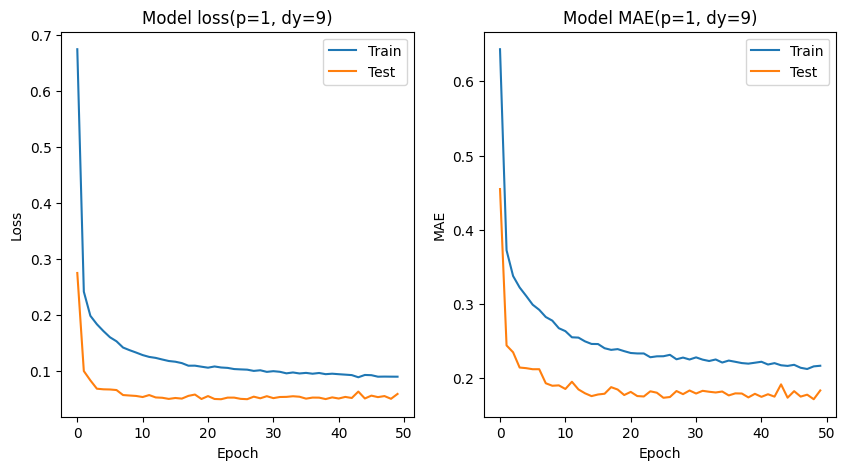

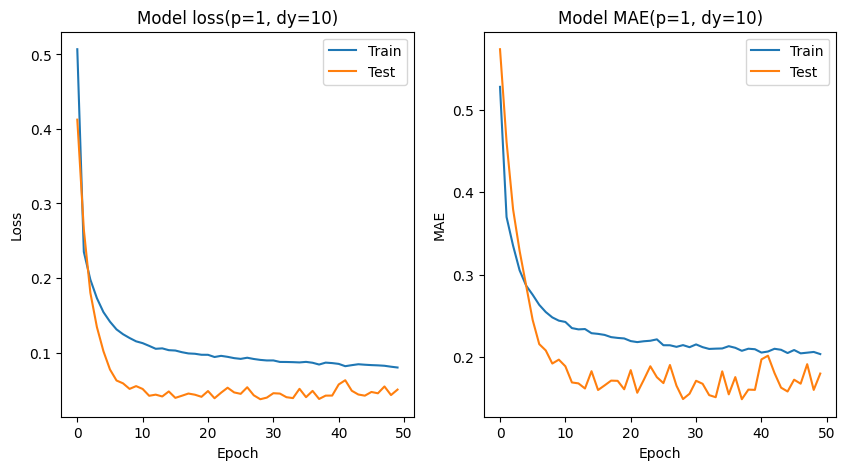

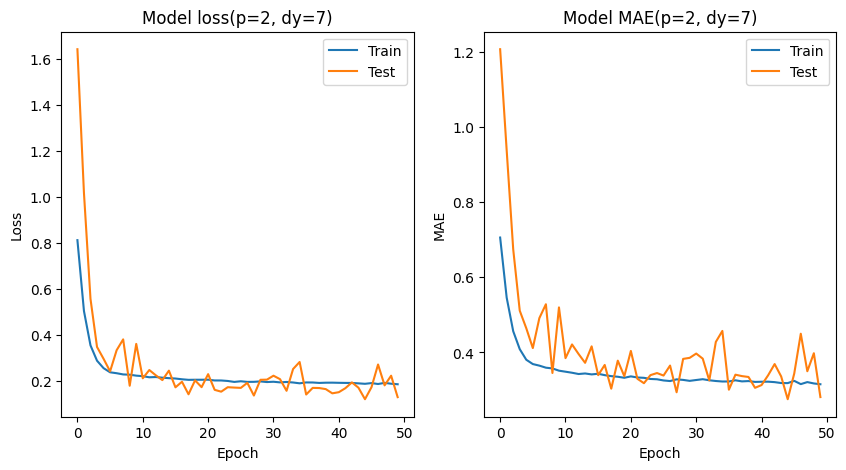

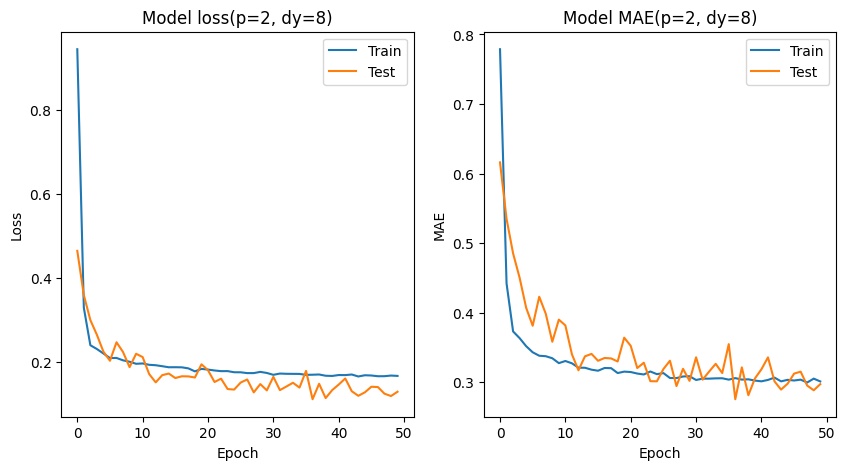

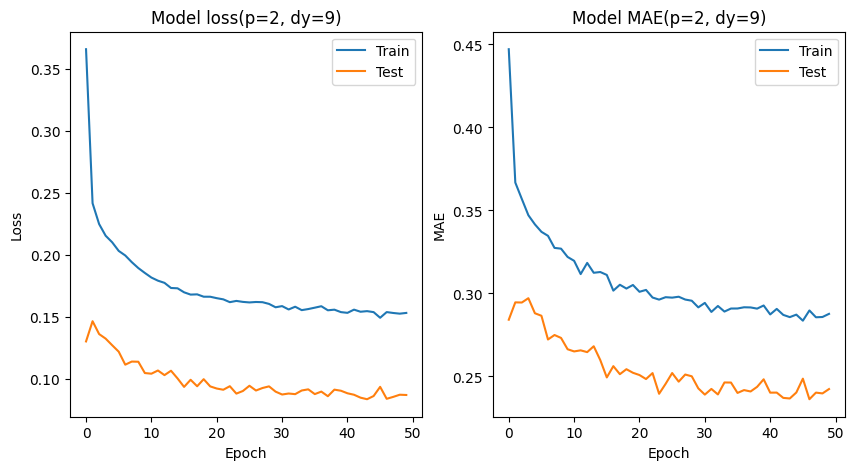

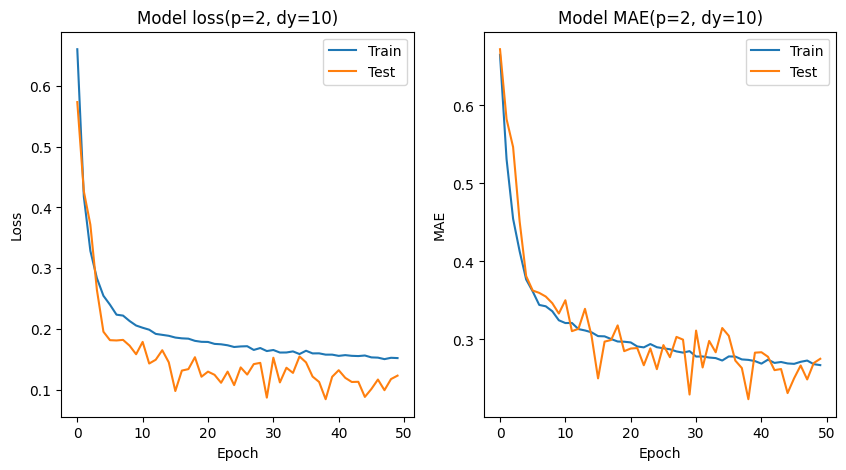

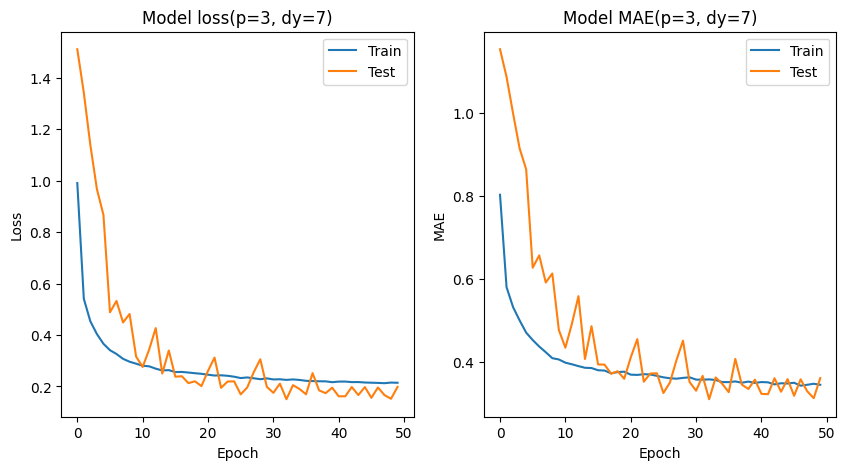

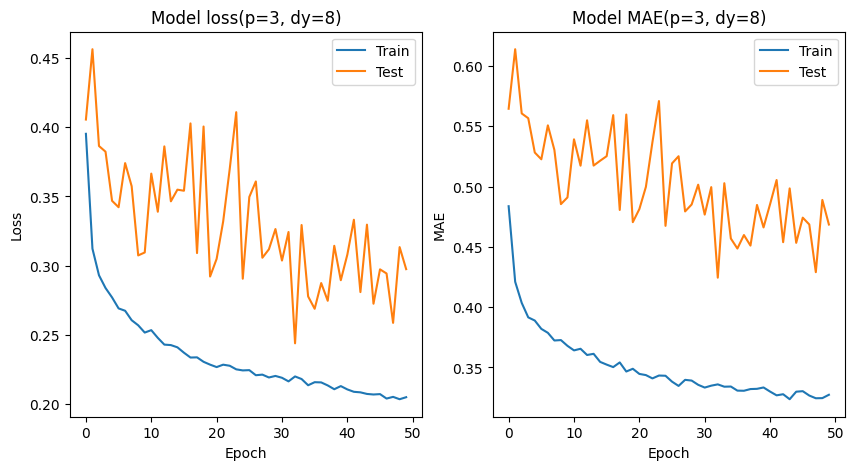

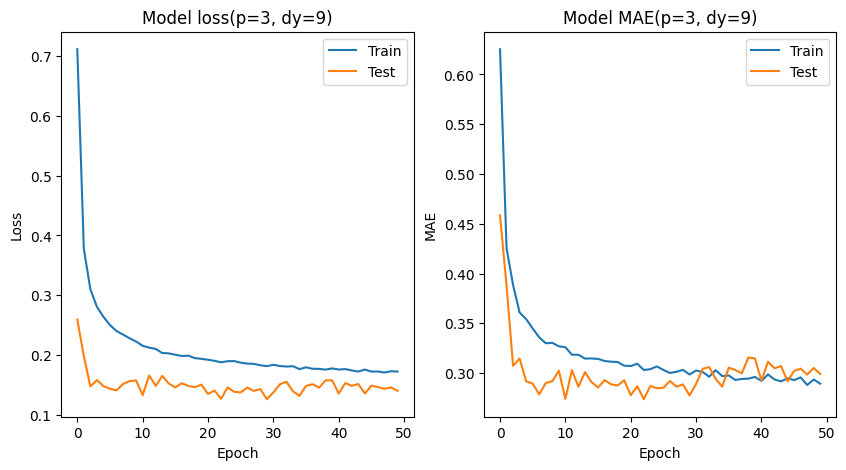

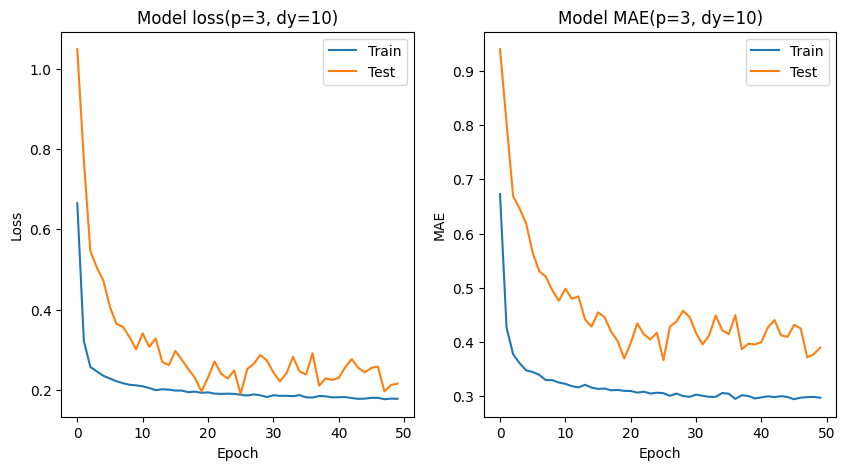

In [4]:
# boucle for sur les différents p et dy
for p in [1,2,3]:
    for dy in [7,8,9,10]:
        
        nn_0=dy+1     # nombre de neurones dans la couche d'entrée
        nn_1=10       # Nombre de neurones dans la couche cachée
        nn_2=1        # Nombre de neurones dans la couche de sortie   
        y=S

        # Input Signal Contruction

        V=y[dy:len(y)-p,]
        for i in range(1, dy+1):
            V=np.c_[V,y[dy-i:len(y)-p-i,]]   

        T=np.mat(y[dy+p:len(y),]).T                                   # Target Signal Contruction 
        
        input_NN=V[:400,:]
        target_NN=T[:400,]
        input_Test=V[400:,:]
        target_Test=T[400:,]
        
        input_mean = np.mean(input_NN)
        target_mean = np.mean(target_NN)
        input_std = np.std(input_NN)
        target_std = np.std(target_NN)

        input_NN = (input_NN - input_mean) / input_std
        target_NN = (target_NN - input_mean) / target_std
        input_Test = (input_Test - input_mean) / input_std
        target_Test = (target_Test - target_mean) / target_std
        
        #model de reseau de neurones
        model = models.Sequential()

        model.add(layers.Dense(nn_0, activation='linear'))
        model.add(layers.Dense(nn_1, activation='relu'))
        model.add(layers.Dense(nn_2, activation='linear'))
        model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
        epochs=50
        batch_size=4
        history = model.fit(input_NN, target_NN, epochs=epochs, batch_size=batch_size, validation_data=(input_Test, target_Test), verbose=0)
    
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

        # Premier graphique pour la perte
        ax1.plot(history.history['loss'])
        ax1.plot(history.history['val_loss'])
        ax1.set_title('Model loss(p={}, dy={})'.format(p, dy))
        ax1.set_ylabel('Loss')
        ax1.set_xlabel('Epoch')
        ax1.legend(['Train', 'Test'], loc='upper right')

        # Deuxième graphique pour la MAE
        ax2.plot(history.history['mae'])
        ax2.plot(history.history['val_mae'])
        ax2.set_title('Model MAE(p={}, dy={})'.format(p, dy))
        ax2.set_ylabel('MAE')
        ax2.set_xlabel('Epoch')
        ax2.legend(['Train', 'Test'], loc='upper right')

        # Afficher la figure
        plt.show()


# Conclusion

On remarque que :

Lorsque p augmente, la tâche de prédiction devient plus difficile car le modèle doit faire des prévisions sur une période plus longue à partir des données passées. Cela peut entraîner une perte de précision car les erreurs peuvent se cumuler au fil du temps.

Lorsque dy augmente, cela signifie que le modèle prend en compte des retards plus longs dans les données passées pour prédire les valeurs futures. Cela peut potentiellement augmenter la précision des prévisions, mais cela peut également rendre le modèle plus complexe et plus difficile à entraîner.
